In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [11]:
df = pd.read_csv('tips.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [23]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [13]:
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df.shape

(244, 3)

In [14]:
cat_df = df.select_dtypes(include=['object'])
cat_df.shape

(244, 4)

In [18]:
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

In [22]:
df.groupby('sex')['tip'].sum().round(2)

sex
Female    246.51
Male      485.07
Name: tip, dtype: float64

In [25]:
df.groupby('time')['size'].sum()

time
Dinner    463
Lunch     164
Name: size, dtype: int64

In [26]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [31]:
df.day.mode()

0    Sat
dtype: object

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

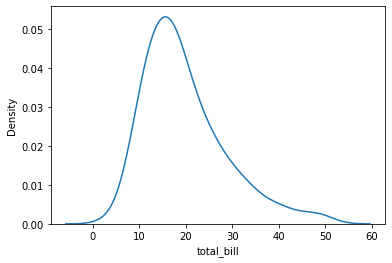

In [36]:
sns.distplot(df['total_bill'], hist=False)

<AxesSubplot:>

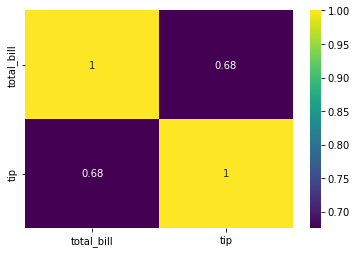

In [46]:
sns.heatmap(df[['total_bill', 'tip']].corr(), annot=True, cmap='viridis')

([<matplotlib.patches.Wedge at 0x2e6ca749c40>,
 [Text(-0.47909423581850497, 0.9901862012800839, 'Male'),
  Text(0.4790942358185044, -0.9901862012800842, 'Female')],
 [Text(-0.2613241286282754, 0.5401015643345912, '64.3%'),
  Text(0.2613241286282751, -0.5401015643345913, '35.7%')])

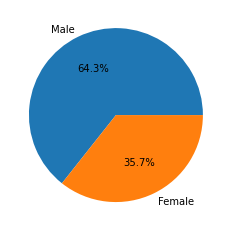

In [59]:
#df['sex'].value_counts(normalize=True)
plt.pie(df.sex.value_counts(), autopct='%.1f%%', radius=1, labels=['Male','Female'])

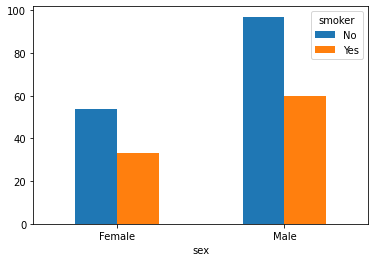

In [100]:
#freq = df.groupby('sex')['smoker'].count()
#plt.bar(freq.index, freq.values, color='goldenrod')
#plt.ylabel('Smoker')
gender = df['sex']
smoker = df['smoker']
crstb = pd.crosstab(gender, smoker)
barplot = crstb.plot.bar(rot=0)

Text(0, 0.5, 'avg_tip')

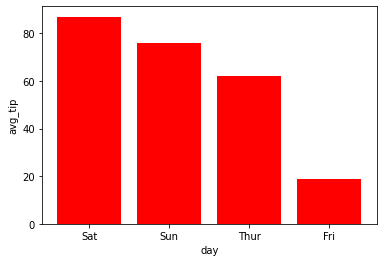

In [93]:
#df.groupby('day')['tip'].mean().round(2)
avg = df.day.value_counts()
plt.bar(avg.index, avg.values, color='red')
plt.xlabel('day')
plt.ylabel('avg_tip')

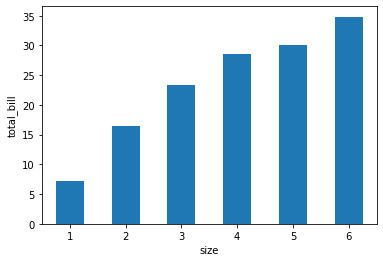

In [108]:
df.groupby('size')['total_bill'].mean().plot(kind='bar')
plt.ylabel('total_bill')
plt.xticks(rotation=0)
plt.show()

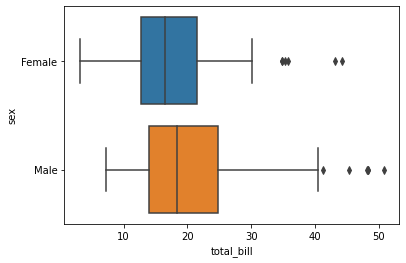

In [109]:
sns.boxplot(x='total_bill', y='sex', data=df)
plt.show()

In [114]:
df_x = df.groupby(['time', 'day'], as_index=False)['total_bill'].max()
df_x[(df_x['day'] == 'Sat') | (df_x['day'] == 'Sun')]

,time,day,total_bill
1,Dinner,Sat,50.81
2,Dinner,Sun,48.17


In [123]:
df.isnull().sum()/len(df)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

In [125]:
len(df[df.duplicated()])
df.drop_duplicates()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


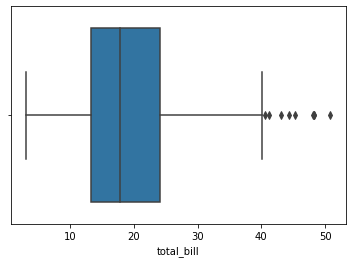

In [127]:
#plot with outliers
sns.boxplot(df['total_bill'])
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


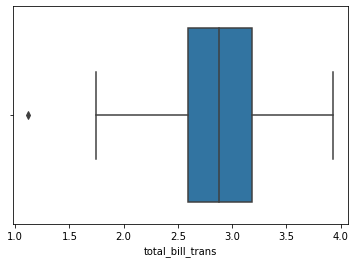

In [128]:
#treating outliers with log transformation
df['total_bill_trans'] = np.log(df['total_bill'])

#plot without outliers
sns.boxplot(df['total_bill_trans'])
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


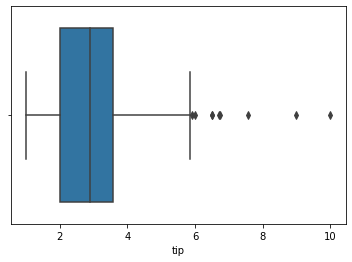

In [129]:
#plot with outliers
sns.boxplot(df['tip'])
plt.show()

In [131]:
#removing outliers using IQR method
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - (1.5*IQR)
upper_whisker = Q3 + (1.5*IQR)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


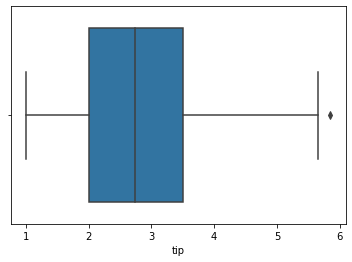

In [132]:
df_out = df.loc[(df['tip'] < upper_whisker) & (df['tip'] > lower_whisker)]     #rows without outliers

sns.boxplot(df_out['tip'])
plt.show()

In [133]:
df = pd.get_dummies(df, drop_first=True)
df.sample(5)

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
123,15.95,2.00,2,2.769459,1,0,0,0,1,1
37,16.93,3.07,3,2.829087,0,0,1,0,0,0
156,48.17,5.00,6,3.874736,1,0,0,1,0,0
61,13.81,2.00,2,2.625393,1,1,1,0,0,0
68,20.23,2.01,2,3.007167,1,0,1,0,0,0


In [136]:
tb_max = df['total_bill'].max()
tb_min = df['total_bill'].min()
range_ = tb_max - tb_min
print(range_)

#initialize minmaxscaler
mn = MinMaxScaler()

#normalizing the value of total_bill so that the range will be 1
df['total_bill_mn'] = mn.fit_transform(df[['total_bill']])

#chcecking the range after normalization
tb_mn_max = df['total_bill_mn'].max()
tb_mn_min = df['total_bill_mn'].min()
range_ = tb_mn_max - tb_mn_min
print(range_)

47.74
0.9999999999999999


In [154]:
tips_df = df.copy()
tips_df = pd.get_dummies(tips_df, drop_first=True)
x = tips_df.iloc[:, [1]]
y = tips_df.iloc[:, [0,2,3,4,5,6]]
display(x, y)

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


,total_bill,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat
0,16.99,2,2.832625,0,0,0
1,10.34,3,2.336020,1,0,0
2,21.01,3,3.044999,1,0,0
3,23.68,2,3.164631,1,0,0
4,24.59,4,3.202340,0,0,0
...,...,...,...,...,...,...
239,29.03,3,3.368330,1,0,1
240,27.18,2,3.302481,0,1,1
241,22.67,2,3.121042,1,1,1
242,17.82,2,2.880321,1,0,1


In [158]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

#initialize minmaxscaler
mn = MinMaxScaler()

df_scaled = df.copy()
df_scaled.iloc[:, [0, 2]] = mn.fit_transform(df_scaled.iloc[:, [0, 2]])
df_scaled

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch,total_bill_mn
0,0.291579,1.01,0.2,2.832625,0,0,0,1,0,0,0.291579
1,0.152283,1.66,0.4,2.336020,1,0,0,1,0,0,0.152283
2,0.375786,3.50,0.4,3.044999,1,0,0,1,0,0,0.375786
3,0.431713,3.31,0.2,3.164631,1,0,0,1,0,0,0.431713
4,0.450775,3.61,0.6,3.202340,0,0,0,1,0,0,0.450775
...,...,...,...,...,...,...,...,...,...,...,...
239,0.543779,5.92,0.4,3.368330,1,0,1,0,0,0,0.543779
240,0.505027,2.00,0.2,3.302481,0,1,1,0,0,0,0.505027
241,0.410557,2.00,0.2,3.121042,1,1,1,0,0,0,0.410557
242,0.308965,1.75,0.2,2.880321,1,0,1,0,0,0,0.308965


In [159]:
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)

LinearRegression()

In [162]:
reg_model.intercept_

array([5.83292281, 1.4281819 , 2.23153879, 0.5789213 , 0.33656966,
       0.30853361])

In [170]:
coeff_df = pd.DataFrame(reg_model.coef_, x.columns, columns=['object'])
coeff_df

ValueError: Shape of passed values is (6, 1), indices imply (1, 1)

In [166]:
y_pred = reg_model.predict(x_test)
from sklearn.metrics import r2_score
print('R squared score is :', r2_score(y_test, y_pred))

R squared score is : 0.1433091065534031
